<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistic-related-Python/blob/main/Bootstrapping_in_pandas%2C_Linear_regression_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrapping regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
mpg = pd.read_csv('https://assets.datacamp.com/production/repositories/3996/datasets/e0b285b89bdbfbbe8d81123e64727ff150d544e0/mpg.csv')
mpg.dropna(axis=0, inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


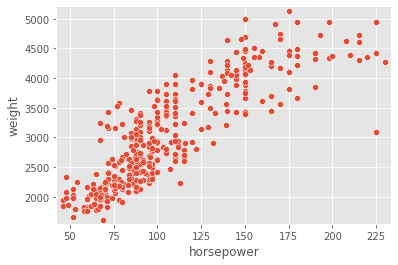

In [ ]:
sns.scatterplot(x='horsepower', y='weight',data=mpg)
plt.margins(0.02)
plt.show()

In [ ]:
from scipy.stats import pearsonr
pearsonr(mpg['weight'], mpg['horsepower'])[0]

0.8645377375741445

slope = 19.078161552697477 weight / horsepower
intercept = 984.5003267702383 weight


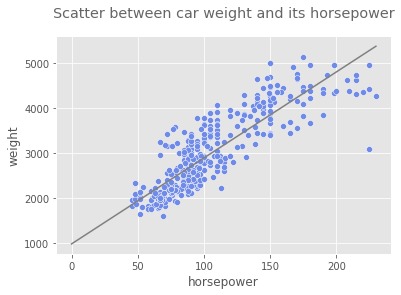

In [ ]:
slope, intercept = np.polyfit(mpg['horsepower'], mpg['weight'], 1)

print('slope =', slope, 'weight / horsepower')
print('intercept =', intercept, 'weight')

# Plot
sns.scatterplot(x='horsepower', y='weight',data=mpg, color='#708BE7')
plt.margins(0.05)

# Make theoretical line to plot
x = np.array([0, mpg['horsepower'].max()])
y = slope * x + intercept
plt.plot(x, y, color='grey')
plt.title('Scatter between car weight and its horsepower', alpha=0.6, y=1.06)
plt.show()

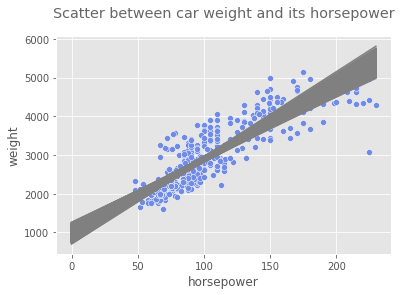

In [ ]:
sims = 10000
size= mpg.shape[0]

bs_slope_reps = np.empty(sims)
bs_intercept_reps = np.empty(sims)

for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = mpg.sample(n=size, replace=True)
    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bootstrap['horsepower'], bootstrap['weight'], 1)
    y = bs_slope_reps[i] * x + bs_intercept_reps[i]
    x = np.array([0, mpg['horsepower'].max()])
    plt.plot(x, y, color='grey')

# Plot
sns.scatterplot(x='horsepower', y='weight',data=mpg, color='#708BE7')
plt.margins(0.05)
plt.title('Scatter between car weight and its horsepower', alpha=0.6, y=1.06)
plt.show()

## 95% CI

In [ ]:
print(bs_slope_reps.mean())

# Compute and print 95% CI for slope
ci_slope = np.percentile(bs_slope_reps, [2.5, 97.5])
print(ci_slope)

# Compute and print 95% CI for intercept
print(np.percentile(bs_intercept_reps, [2.5, 97.5]))

19.116283548050223
[17.5877415  20.62797489]
[ 834.76280292 1132.9458076 ]


## slope distribution function

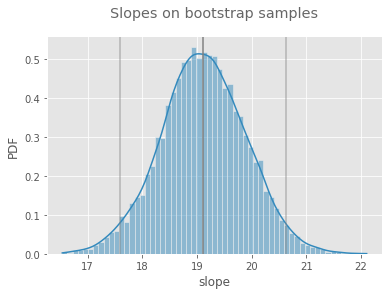

In [ ]:
# Plot the histogram
sns.histplot(bs_slope_reps, stat='density', kde=True)
plt.axvline(x=bs_slope_reps.mean(), color="grey", linestyle="-", label='mean')
plt.axvline(x=ci_slope[0], color="grey", linestyle="-", label='CI 95%', alpha=0.5)
plt.axvline(x=ci_slope[1], color="grey", linestyle="-", label='CI 95%', alpha=0.5)
plt.xlabel('slope')
plt.title('Slopes on bootstrap samples', alpha=0.6, y=1.06)
plt.ylabel('PDF')
plt.show()